In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Miniteste 2

Dados os pontos da tabela:

| x | y |
| -- | -- |
-1 | 0.03846154
-0.5 | 0.13793103
0 | 1
0.5 | 0.13793103
1 | 0.03846154

1. Utilizando o polinômio de Newton encontre (manualmente) os coeficiente do polinômio interpolador de ordem 4. **Trace o gráfico entre -1 e 1 com intervalo de 0.01 entre os pontos**  

2. Utilizando o polinômio de Lagrange encontre (manualmente) os coeficiente do polinômio interpolador de ordem 4. **Trace o gráfico entre -1 e 1 com intervalo de 0.01 entre os pontos** 

Compare os gráficos obtidos com a resposta exata dada pela função

$$f(x) = \frac{1}{1+25x^2}$$

3. Comente sobre os resultados obtidos.


In [0]:
#METODOS

def pd(inicio,fim,m_val,m_controle,val_x,val_y):
  if m_controle[inicio,fim]:
    return m_val[inicio,fim] 
  if(inicio==fim):
    return val_y[inicio]
  m_val[inicio,fim]=(pd(inicio+1,fim,m_val,m_controle,val_x,val_y)-pd(inicio,fim-1,m_val,m_controle,val_x,val_y))/(val_x[fim]-val_x[inicio])
  m_controle[inicio,fim]=1
  return m_val[inicio,fim];

def newton(x,val_x,val_y):
  coeficientes = np.zeros(val_x.shape[0])
  m_val=np.zeros((val_x.shape[0],val_x.shape[0]),dtype=float)
  m_controle=np.zeros((val_x.shape[0],val_x.shape[0]),dtype=bool)
  res=0;
  diferenca=1;
  for i in range (coeficientes.shape[0]):
    coeficientes[i]=pd(0,i,m_val,m_controle,val_x,val_y)
    res+=diferenca*coeficientes[i]
    diferenca*=x-val_x[i]
  print('Valores dos coeficientes = ',coeficientes);
  #print('f(',x,') = ', res,sep='')
  return coeficientes

def lagrange(x,val_x,val_y):
  for i in range(val_x.shape[0]):
    if val_x[i]==x:
      return val_y[i]
  
  g=np.zeros((val_x.shape[0],val_x.shape[0])) #matriz G para metodo de lagrange utilizando dispositivo pratico
  gd=1 #produto da diagonal principal
  l=val_y.copy();

  #for para construir a matriz; onde i=j o valor é x-val_x[coluna]; onde i!=j, val_x[linha]-val_x[coluna]
  for i in range(g.shape[0]): 
    for j in range(g.shape[0]): 
      if i!=j:
        g[i,j]=val_x[i]-val_x[j]
      else:
        g[i,j]=x-val_x[j]
        gd*=g[i,j] #atualiza o produto da diagonal principal
  res=0;
  for i in range(g.shape[0]):
    l[i]=gd/np.prod(g[i,:]) #Cada Li(x) recebe o quociente entre o produto da diagonal principal e o produto da respectiva linha i.
    res+=l[i]*val_y[i] #o resultado é a soma de cada Li(x) com o respectivo val_y[x](ou valor de f(xi))

  # print('f(',x,') = ',res,sep='')
  # print('Coeficientes = ', l)
  return res

Valores dos coeficientes =  [ 0.03846154  0.19893898  1.52519896 -3.31564989  3.31564989]


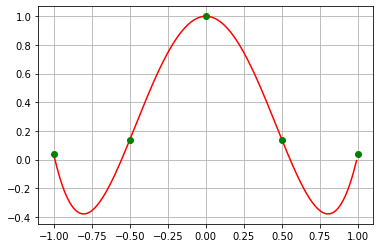

In [0]:
#1. NEWTON
x1=np.array([-1.0,-.5,0.0,.5,1.0])
y1=np.array([0.03846154,0.13793103,1.0,0.13793103,0.03846154])

a=newton(-1.0,x1,y1)
x2=np.arange(-1.0,1.0,0.01,dtype=float);
y2=np.zeros(x2.shape[0],dtype=float)

for i in range(x2.shape[0]):
  res=0
  diferenca=1
  for j in range(a.shape[0]):
    y2[i]+=diferenca*a[j]
    diferenca*=x2[i]-x1[j]
plt.plot(x2,y2,'r-', x1,y1,'go')
plt.grid(1)
plt.show()

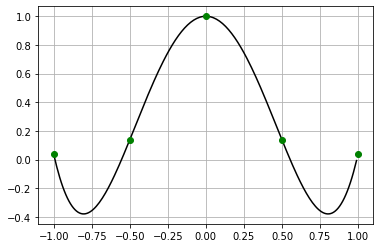

In [0]:
#2. LAGRANGE
x3=np.arange(-1.0,1.0,0.01,dtype=float);
y3=np.zeros(x3.shape[0],dtype=float)

for i in range(x3.shape[0]):
  y3[i]=lagrange(x3[i],x1,y1)

plt.plot(x3,y3,'k-',x1,y1,'go')
plt.grid(1)
plt.show()

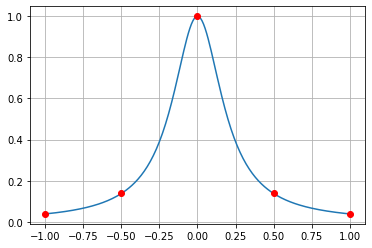

In [0]:
#3. COMPARAÇÃO
x_i = np.array([-1,-0.5,0,0.5,1])
y_i = 1/(1+25*x_i**2) 

x = np.arange(-1,1,0.01)
y = 1/(1+25*x**2)
plt.plot(x,y,'-',
        x_i,y_i,'ro')
plt.grid(True)

#3.Comentários
<p align="justify"> Os resultados gráficos das interpolações foram parecidos com o gráfico da função original. Em ambos (newton e lagrange) houve uma porção da curva que ficou abaixo do eixo das abcissas entre 0 e 1 e 0 e -1, enquanto que no original há apenas números positivos para y. Outro ponto de destaque é a abertura da curva após o eixo de simetria x=0, enquanto que na função original se estende até 0.25 para mais e para menos, nos gráficos gerados pela interpolação a abertura se estede até 0.5 para mais e para menos. </p>
<p align="justify"> Considero satisfatório o resultado da interpolação, uma vez que o gráfico passa pelos pontos iniciais e a função responde de modo parecido com a função original.</p>